mainly by professor Marcus Gubanyi

In [2]:
import pandas as pd
import seaborn as sns


In [3]:
# Load the dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)


## 1: What is a data frame?

A two-dimensional, size-mutable, and potentially heterogeneous(多於一種) tabular data structure in Pandas, similar to an Excel spreadsheet or SQL table. It consists of rows and columns, where:
* Each column can have different data types (e.g., integers, floats, strings, etc.).
* Each row represents an observation or record.
* It has row labels (called the index) and column labels.

同一直行東西要一樣，不同直行可以有不同內容

You can think of a DataFrame as a collection of parallel Series objects (each representing a column) that share a common index.
* A series object is a labelled array of data, all the same data type.
* An index is a look-up tool. In DataFrames and Series, an index is a unique identifier for each row.

Key Properties:
* Size-mutable: You can add or remove rows and columns. =>可以增減
* Label-based: Rows and columns are labeled, making data manipulation intuitive.
* Heterogeneous: Columns can contain different data types (e.g., numeric, string).

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2: Working with Data in a DataFrame
#### 2.1: Change a specific value in a row and column.
* Use the .loc function to change values by referencing rows and columns with labels.
* Alternatively, use the .iloc function to change values by refencing positions (Not recommended).

  iloc only works on index(????


In [7]:
df.loc[df['Name'] == 'Braund, Mr. Owen Harris', 'Age'] = 22.7
# look for row then look for column
df.iloc[0, 1] = 1 # Be careful!
# ????? ask

In [8]:
df.head() # Note that we updated the first row. Survived now is 1 and age is now 22.7.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,3,"Braund, Mr. Owen Harris",male,22.7,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 2.2: Update and add columns (Series)
* Columns can be assigned to a new list, array, or constant value.
* Arithmetic can be performed elegantly. 
* Apply a function with .apply
If the column exists, assignment overwrites it otherwise it creates it.

.apply function is super useful!

In [17]:
num = [1,2,3]
num * 3
# This is what happens if just using Python to do multiply
# does not work the same in panda (data frame), see next cell
# DOes not work the same - ny function overload

[1, 2, 3, 1, 2, 3, 1, 2, 3]

In [18]:
df['DaysOld'] = 0
#creates a new column if not already exists, set all value in that to zero

df['DaysOld'] = df['Age'] * 365
df['DaysOld'] = df['Age'].apply(lambda x: x*365) # Does the same thing as the previous line

# While series work with arithmetic operators, they do not work with functions in general
# RUNTIME ERROR
# df['FareInt'] = int(df['Fare'])
df['FareInt'] = df['Fare'].apply(int)

#### 2.3: Update and add rows
* Use the .loc functions
* Use the .concat function (note that .append is deprecated)


In [7]:
df.loc[0] = [0, 0, 0, 'MISSING', 'NA', 0, 0, 0, 'NA', 0, 'NA', 'NA', 0, 0]
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,DaysOld,FareInt
0,0,0,0,MISSING,NA,0.0,0,0,NA,0.0000,NA,NA,0.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,13870.0,71


In [20]:
row = {'PassengerId':0, 
       'Survived':0, 
       'Pclass':0, 
       'Name':'MISSING',
       'Sex':'NA',
       'Age':0,
       'SibSp':0,
       'Parch':0,
       'Ticket':'NA',
       'Fare':0,
       'Cabin':'NA',
       'Embarked':'NA',
       'DaysOld':0,
       'FareInt':0}
# pass a dictionary instead of a list might me better

df = pd.concat([df, pd.DataFrame([row])], ignore_index=True)
df.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,DaysOld,FareInt
891,0,0,0,MISSING,NA,0.0,0,0,NA,0.0,NA,NA,0.0,0
892,0,0,0,MISSING,NA,0.0,0,0,NA,0.0,NA,NA,0.0,0


#### 2.4: Filtering Data (SO helpful and important!)
* Filter with one or more conditions on columns.
    * Logical operators are different! & (AND), | (OR), ~ (NOT)
    * Each condition should be enclosed in parenthesis unless there's only one.
* Use .isin to filter a column based on multiple values.
* You can also update rows after filtering!

In [9]:
df[ df['PassengerId'] == 891]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,DaysOld,FareInt
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,11680.0,7


In [10]:
df[ (df['Sex'] == 'male') & (df['Age'] < 33) & (31 < df['Age'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,DaysOld,FareInt
70,71,0,2,"Jenkin, Mr. Stephen Curnow",male,32.0,0,0,C.A. 33111,10.5000,NaN,S,11680.0,10
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S,11680.0,56
122,123,0,2,"Nasser, Mr. Nicholas",male,32.5,1,0,237736,30.0708,NaN,C,11862.5,30
206,207,0,3,"Backstrom, Mr. Karl Alfred",male,32.0,1,0,3101278,15.8500,NaN,S,11680.0,15
382,383,0,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S,11680.0,7
429,430,1,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32.0,0,0,SOTON/O.Q. 392078,8.0500,E10,S,11680.0,8
519,520,0,3,"Pavlovic, Mr. Stefo",male,32.0,0,0,349242,7.8958,NaN,S,11680.0,7
543,544,1,2,"Beane, Mr. Edward",male,32.0,1,0,2908,26.0000,NaN,S,11680.0,26
569,570,1,3,"Jonsson, Mr. Carl",male,32.0,0,0,350417,7.8542,NaN,S,11680.0,7
579,580,1,3,"Jussila, Mr. Eiriik",male,32.0,0,0,STON/O 2. 3101286,7.9250,NaN,S,11680.0,7


In [11]:
df.loc[(df['Sex'] == 'male') & (df['Age'] == 32), 'Age'] = 32.32
df[ df['PassengerId'] == 891]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,DaysOld,FareInt
890,891,0,3,"Dooley, Mr. Patrick",male,32.32,0,0,370376,7.75,NaN,Q,11680.0,7


#### 2.5: Miscellaneous
* Use the .drop function remove rows (axis=0) or columns (axis=1).
    * Be cautious, it changes the data itself. To get back the dropped data, need to reload the csv
* Use the .replace function to replace values in a columns.
    * Does not change the original dataframe
* Use the .rename function to change column names or row indices.

In [23]:
# df.drop('DaysOld', axis=1, inplace=True)
# df.drop(890, axis=0, inplace=True)
df.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,DaysOld,FareInt
891,0,0,0,MISSING,NA,0.0,0,0,NA,0.0,NA,NA,0.0,0
892,0,0,0,MISSING,NA,0.0,0,0,NA,0.0,NA,NA,0.0,0


In [29]:
df['Sex'] = df['Sex'].replace('male', 'man')
# Replace does not change the actual data, unless you reassign it.
# Replace fetches the slice of data you want, make a copy somewhere, and put the new data inside that copiedversion.

In [25]:
df.rename(columns={'Age': 'HowOld'}, inplace=True)
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,HowOld,SibSp,Parch,Ticket,Fare,Cabin,Embarked,DaysOld,FareInt
0,1,1,3,"Braund, Mr. Owen Harris",man,22.7,1,0,A/5 21171,7.2500,NaN,S,8285.5,7
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,13870.0,71


In [22]:
#######################
# some practice

df.shape

(893, 14)

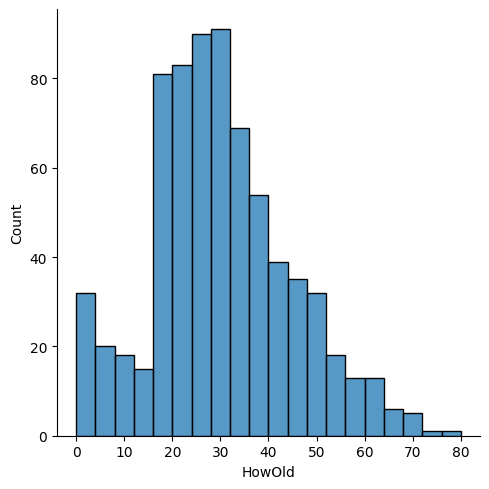

In [26]:
sns.displot(df, x="HowOld")